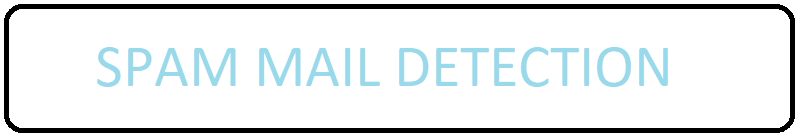

# 🎯About Dataset:
The "spam" dataset typically refers to a collection of text messages or emails that are labeled as either "spam" (unsolicited and often
unwanted messages) or "ham" (legitimate messages). This dataset is commonly used for training and evaluating machine learning
models for spam detection or text classification tasks. The dataset provides a labeled set of examples that helps algorithms learn to
distinguish between spam and non-spam messages based on their content.

# 🎯Models used:
## Gaussian Naive Bayes (GaussianNB):
Gaussian Naive Bayes is a probabilistic classification algorithm that assumes the features to be normally distributed. It's particularly
useful for continuous or numerical data. By modeling the data's distribution using Gaussian (normal) distribution, GaussianNB
calculates the likelihood of a given class label based on the observed feature values, making it a simple yet effective choice for
classification tasks involving continuous features.
## Bernoulli Naive Bayes (BernoulliNB):
Bernoulli Naive Bayes is a variation of the Naive Bayes algorithm that's suitable for binary or boolean features, often representing
presence or absence of certain attributes. It assumes that features are binary and computes probabilities based on how frequently
each feature occurs for each class. BernoulliNB is often used in text classification tasks where features indicate the presence or
absence of specific words in a document, resulting in a sparse binary matrix.
## Multinomial Naive Bayes (MultinomialNB):
Multinomial Naive Bayes is designed for discrete data, typically in the form of count-based features like word frequencies in text data.
It's a common choice for text classification, where features are often represented as counts or frequencies of words. MultinomialNB
works by estimating the probability of observing a specific feature given a class label, and then combines these probabilities to
determine the most likely class label for a given set of features.

# 🎯Importing necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 🎯Loading and Reading Dataset

In [3]:
dataset ='Spam.tsv'
df = pd.read_csv(dataset, sep = '\t')
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


## 🎯Statistical Analysis of dataset

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


# 🎯Information about Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


### 👉-No missing values

## 🎯Imbalance data check

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
df['label'].value_counts()/len(df)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

### 📌 Imbalance data as Majiority>2*Minority

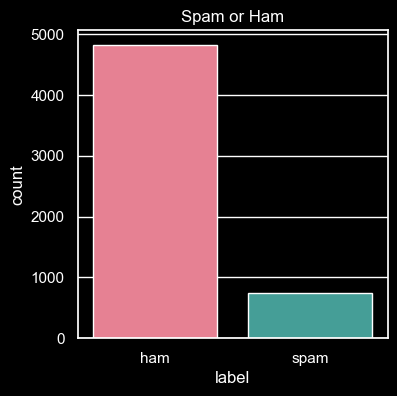

In [10]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= df.label, data= df, palette ='husl')
ax.set_title('Spam or Ham')
plt.show()

ham     4825
spam     747
Name: label, dtype: int64


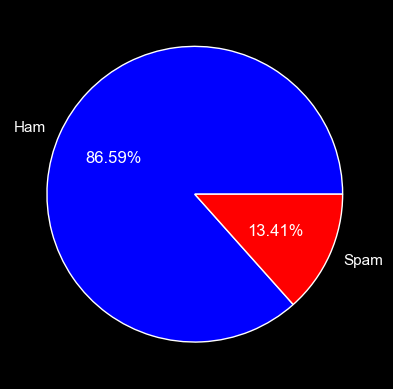

In [16]:
label_value_counts = df.label.value_counts()
print(label_value_counts)
labels = ['Ham', 'Spam']
colors =['blue','red']
plt.pie(label_value_counts,autopct='%1.2f%%',labels = labels, colors=colors)
plt.show()

## 👉-Balancing data

In [22]:
ham=df[df['label']=='ham']
spam1=df[df['label']=='spam']

In [24]:
print(ham.shape)
print(spam1.shape)

(4825, 4)
(747, 4)


### OVERSAMPLING

In [25]:
spam1.sample()

,label,message,length,punct
4797,spam,URGENT This is our 2nd attempt to contact U. Y...,135,2


In [26]:
spam1.sample(2)

,label,message,length,punct
869,spam,Hello. We need some posh birds and chaps to us...,134,4
4256,spam,Block Breaker now comes in deluxe format with ...,156,2


In [27]:
spam=spam1.sample(ham.shape[0],replace=True)

In [29]:
print('Before sampling:')
print('Ham:',ham.shape)
print('Spam:',spam1.shape)
print()
print('After sampling:')
print('Ham:',ham.shape)
print('Spam:',spam.shape)

Before sampling:
Ham: (4825, 4)
Spam: (747, 4)

After sampling:
Ham: (4825, 4)
Spam: (4825, 4)


In [30]:
data=ham.append(spam,ignore_index=True)

In [31]:
data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
9645,spam,CLAIRE here am havin borin time & am now alone...,153,3
9646,spam,ree entry in 2 a weekly comp for a chance to w...,142,6
9647,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",97,11
9648,spam,UR awarded a City Break and could WIN a £200 S...,149,5


In [32]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,ham,Even my brother is not like to speak with me. ...,77,2


In [33]:
data.tail()

,label,message,length,punct
9645,spam,CLAIRE here am havin borin time & am now alone...,153,3
9646,spam,ree entry in 2 a weekly comp for a chance to w...,142,6
9647,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",97,11
9648,spam,UR awarded a City Break and could WIN a £200 S...,149,5
9649,spam,More people are dogging in your area now. Call...,159,6


In [27]:
data.shape

(9650, 4)

## 🎯Visualization by using ham and spam dataset

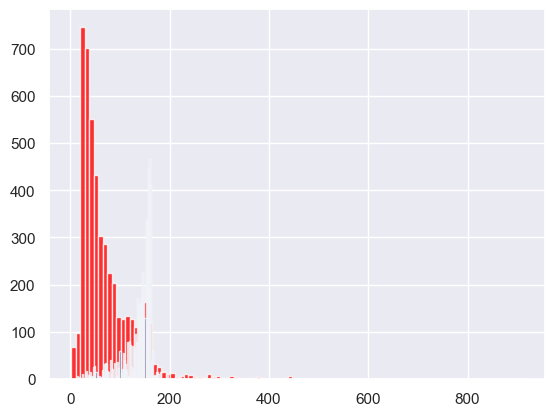

In [30]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.8,color='red')
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.8)
plt.show()

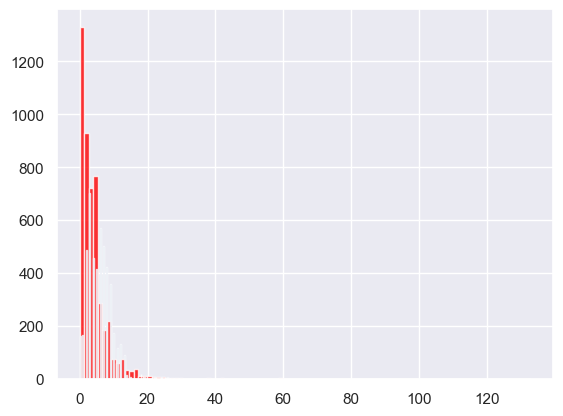

In [31]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.8,color='red')
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.8)
plt.show()

### 📌Both length and punctuation features of ham and spam are overridding so can't differentiate them based on length and punct

# 🎯Encoding:

## 🎯BAG OF WORDS:
- Machine learning models require numerical data as input. We call these numerical representations “vectors”. So if you’re working with text you’ll need to convert the text into a vector before feeding it to a model..We call it a bag of words to emphasize the fact that the order of words is not taken into account.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(data['message']).toarray()

In [35]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
pd.DataFrame(x).shape

(9650, 8713)

In [37]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,8703,8704,8705,8706,8707,8708,8709,8710,8711,8712
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9647,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 🎯Split data into train and test

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,data['label'],test_size=0.25,random_state=102,stratify=data['label'])

# 🎯MODEL BUILDING:

### Building NAIVE BAYES THEOREM
### GAUSSIAN NB
### BERNOULLIS NB

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [40]:
gnb=GaussianNB()
bnb=BernoulliNB()

In [41]:
gnb.fit(x_train,y_train)

GaussianNB()

In [42]:
y_pred_gnb_train=gnb.predict(x_train)
y_pred_gnb_test=gnb.predict(x_test)

In [43]:
y_pred_gnb_train

array(['ham', 'spam', 'spam', ..., 'ham', 'spam', 'spam'], dtype='<U4')

In [44]:
y_pred_gnb_test

array(['spam', 'spam', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_bnb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_gnb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_gnb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_gnb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_gnb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_gnb_test))

Confusion_matrix_train: [[3616    2]
 [ 105 3514]]

Confusion_matrix_test: [[1081  126]
 [   0 1206]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         ham       1.00      0.93      0.96      3618
        spam       0.94      1.00      0.97      3619

    accuracy                           0.97      7237
   macro avg       0.97      0.97      0.97      7237
weighted avg       0.97      0.97      0.97      7237


classification_report_test:               precision    recall  f1-score   support

         ham       1.00      0.90      0.94      1207
        spam       0.91      1.00      0.95      1206

    accuracy                           0.95      2413
   macro avg       0.95      0.95      0.95      2413
weighted avg       0.95      0.95      0.95      2413

************************************************************
accuracy_score_train: 0.9660080143705956

accuracy_score_test: 0

In [80]:
precision_train_gnb_ham=1.00
precision_train_gnb_spam=0.94
f1_score_train_gnb_ham=0.96
f1_score_train_gnb_spam=0.97
precision_test_gnb_ham=1.00
precision_test_gnb_spam=0.91
f1_score_test_gnb_ham=0.94
f1_score_test_gnb_spam=0.95

In [48]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [54]:
y_pred_bnb_train=bnb.predict(x_train)
y_pred_bnb_test=bnb.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_bnb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_bnb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_bnb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_bnb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_bnb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_bnb_test))

Confusion_matrix_train: [[3616    2]
 [ 105 3514]]

Confusion_matrix_test: [[1205    2]
 [  24 1182]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      3618
        spam       1.00      0.97      0.99      3619

    accuracy                           0.99      7237
   macro avg       0.99      0.99      0.99      7237
weighted avg       0.99      0.99      0.99      7237


classification_report_test:               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       1.00      0.98      0.99      1206

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413

************************************************************
accuracy_score_train: 0.9852148680392427

accuracy_score_test: 0

In [56]:
print('Accuracy of the Train data by GaussianNB :',accuracy_score(y_train,y_pred_gnb_train))
print('===============================================================================================')
print('Accuracy of the Test data  by GaussianNB:',accuracy_score(y_test,y_pred_gnb_test))
print('===============================================================================================')
print('Accuracy of the Train data by BernoulliNB:',accuracy_score(y_train,y_pred_bnb_train))
print('===============================================================================================')
print('Accuracy of the Test data  by BernoulliNB  :',accuracy_score(y_test,y_pred_bnb_test))

Accuracy of the Train data by GaussianNB : 0.9660080143705956
Accuracy of the Test data  by GaussianNB: 0.947782842934107
Accuracy of the Train data by BernoulliNB: 0.9852148680392427
Accuracy of the Test data  by BernoulliNB  : 0.9892250310816411


In [83]:
precision_train_bnb_ham=0.97
precision_train_bnb_spam=1.00
f1_score_train_bnb_ham=0.99
f1_score_train_bnb_spam=0.99
precision_test_bnb_ham=0.98
precision_test_bnb_spam=1.00
f1_score_test_bnb_ham=0.99
f1_score_test_bnb_spam=0.99

### 📌Accuracy of train data by GaussianNB:96.6%
### 📌Accuracy of test data by GaussianNB:94.7%
### 📌Accuracy of train data by BernoullliNB:98.5%
### 📌Accuracy of test data by BernoullliNB:98.3%

In [62]:
from sklearn.model_selection import cross_val_score
CV_train_acc =(cross_val_score(gnb, x_train, y_train, cv =10).mean()).round(2)*100
CV_test_acc =(cross_val_score(gnb, x_test, y_test, cv =10).mean()).round(2)*100
print(f'▬ Training Accuracy GaussianNB(CrossValidation), {CV_train_acc} %' )
print(f'▬ TestAccuracy GaussianNB(CrossValidation), {CV_test_acc} %' )
variance_CV = abs(CV_train_acc - CV_test_acc).round(2)
print(f'Variance (CrossValidation) : {variance_CV}')
if (variance_CV > 9) or (CV_train_acc > 99):
    print(f'WARN : The  Model is overfitting')
    print()

▬ Training Accuracy GaussianNB(CrossValidation), 94.0 %
▬ TestAccuracy GaussianNB(CrossValidation), 91.0 %
Variance (CrossValidation) : 3.0


In [63]:
from sklearn.model_selection import cross_val_score
CV_train_acc =(cross_val_score(bnb, x_train, y_train, cv =10).mean()).round(2)*100
CV_test_acc =(cross_val_score(bnb, x_test, y_test, cv =10).mean()).round(2)*100
print(f'▬ Training Accuracy BernoulliNB(CrossValidation), {CV_train_acc} %' )
print(f'▬ TestAccuracy BernoulliNB(CrossValidation), {CV_test_acc} %' )
variance_CV = abs(CV_train_acc - CV_test_acc).round(2)
print(f'Variance (CrossValidation) : {variance_CV}')
if (variance_CV > 9) or (CV_train_acc > 99):
    print(f'WARN : The  Model is overfitting')
    print()

▬ Training Accuracy BernoulliNB(CrossValidation), 98.0 %
▬ TestAccuracy BernoulliNB(CrossValidation), 97.0 %
Variance (CrossValidation) : 1.0


# SUMMARY

In [89]:
list1=[precision_test_gnb_ham,precision_test_gnb_spam,precision_test_bnb_ham,precision_test_bnb_spam,f1_score_test_gnb_ham,f1_score_test_gnb_spam,f1_score_test_bnb_ham,f1_score_test_bnb_spam]
list2=['precision_test_gnb_ham','precision_test_gnb_spam','precision_test_bnb_ham','precision_test_bnb_spam','f1_score_test_gnb_ham','f1_score_test_gnb_spam','f1_score_test_bnb_ham','f1_score_test_bnb_spam']
summary=pd.DataFrame({'Scores':list2,'PRECISION_F1':list1})
summary

,Scores,PRECISION_F1
0,precision_test_gnb_ham,1.00
1,precision_test_gnb_spam,0.91
2,precision_test_bnb_ham,0.98
3,precision_test_bnb_spam,1.00
4,f1_score_test_gnb_ham,0.99
5,f1_score_test_gnb_spam,0.99
6,f1_score_test_bnb_ham,0.99
7,f1_score_test_bnb_spam,0.99


AxesSubplot(0.125,0.11;0.775x0.77)


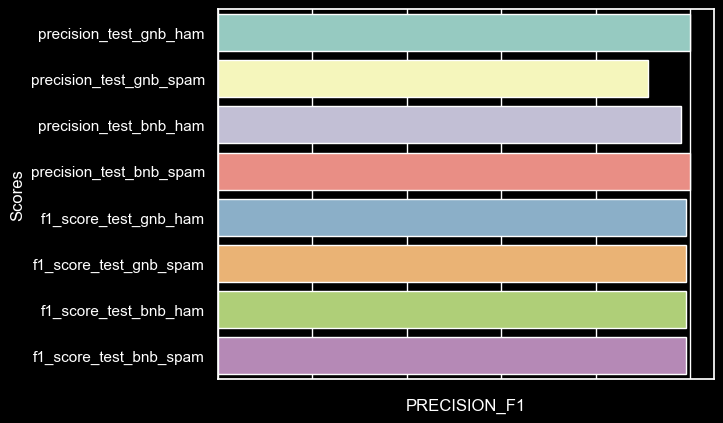

In [90]:
chart=sns.barplot(x='PRECISION_F1',y='Scores',data=summary)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
print(chart)

In summary, the analysis shows that BernoulliNB achieved the highest accuracy among the two classifiers, along with excellent
precision and a balanced F1-score.
GaussianNB but with slightly lower precision, potentially indicating it might be more cautious in labeling messages as spam.
It's worth noting that the choice of classifier depends on the specific use case and priorities.
(legitimate messages classified as spam) is crucial, BernoulliNB's high precision might be preferred.